In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pnd
import math as mth

In [3]:
class FuzzySet:
    def __init__(self):
        self.fuzzy_set = set()
        
    def __init__(self, *args):
        self.fuzzy_set = set()
        for grade, item in args:
            self.fuzzy_set.add((grade, item))
    
    def max_grade(self):
        max_gr = 0
        for i in self.fuzzy_set:
            if i[0] > max_gr:
                max_gr = i[0]
        return max_gr
    
    def get_universum(self):
        universum = set()
        for i in self.fuzzy_set:
            universum.add(i[1])
        return universum

    def get_support(self):
        support = set()
        for i in self.fuzzy_set:
            if i[0] > 0:
                support.add(i[1])
        return support
    
    def get_points(self):
        points = list()
        for i in self.fuzzy_set:
            if i[0] == 0.5:
                points.append(i[1])
        return points
    
    def get_modal(self):
        max_gr = self.max_grade()
        if max_gr < 1:
            return False
        else:
            count = 0
            for i in self.fuzzy_set:
                if i[0] == max_gr:
                    count = count + 1
            if count == 1:
                return True
            else:
                return False
    
    def get_normal_subnormal(self):
        max_gr = self.max_grade()
        if max_gr == 1:
            return True #is normal
        else:
            return False #is subnormal
    
    def get_height(self):
        max_gr = self.max_grade()
        result = set()
        for i in self.fuzzy_set:
            if i[0] == max_gr:
                result.add(i[1])
        return result
    
    
    def get_core(self):
        max_gr = self.max_grade()
        if max_gr != 1:
            return None
        else:
            result = set()
            for i in self.fuzzy_set:
                if i[0] == max_gr:
                    result.add(i[1])
            return result

    def get_borders(self):
        result = set
        for i in self.fuzzy_set:
            if i[0] > 0 and i[0] < 1:
                result.add(i[1])
        return result
    
    def get_normal_set(self):
        if self.get_normal_subnormal():
            return None
        else:
            result = set()
            max_gr = self.max_grade()
            for i in self.fuzzy_set:
                result.add((round(i[0]/max_gr, 2), i[1]))
            return result

Даны два нечетких множества
$$X = \{\frac{0,6}{1} + \frac{0,4}{2} + \frac{0,5}{4} + \frac{0,9}{5} + \frac{0,3}{6} + \frac{0,2}{8} + \frac{0,1}{9}\}$$
$$Y = \{\frac{0,8}{1} + \frac{0,6}{2} + \frac{0,9}{3} + \frac{1}{4} + \frac{1}{5} + \frac{0,3}{6} + \frac{0,5}{9}\}$$
Задание 1. Написать характеристику обоих множеств (универсум, носитель, точки перехода, унимодальность функции принадлежности, нормальное или субнормальное нечеткого множества, высота, ядро, границы нечеткого множества) 

Универсум множества Х: {1, 2, 4, 5, 6, 8, 9}
Носитель множества X: {1, 2, 4, 5, 6, 8, 9}
Точки перехода множества X: 4
Функция множества X не унимодально.
Множество X нормально.
Высота множества X:  {5}
Ядро множества X: отсутствует.
Границы множества X:  [1, 6, 5, 4, 9, 8, 2] 

Универсум множества Y: {1, 2, 3, 4, 5, 6, 9}
Носитель множества Y: {1, 2, 3, 4, 5, 6, 9}
Точки перехода множества Y: 9
Функция множества Y не унимодально.
Множество Y нормально.
Высота множества Y:  {4, 5}
Ядро множества Y:  {4, 5}
Границы множества Y:  [1, 6, 9, 3, 2] 



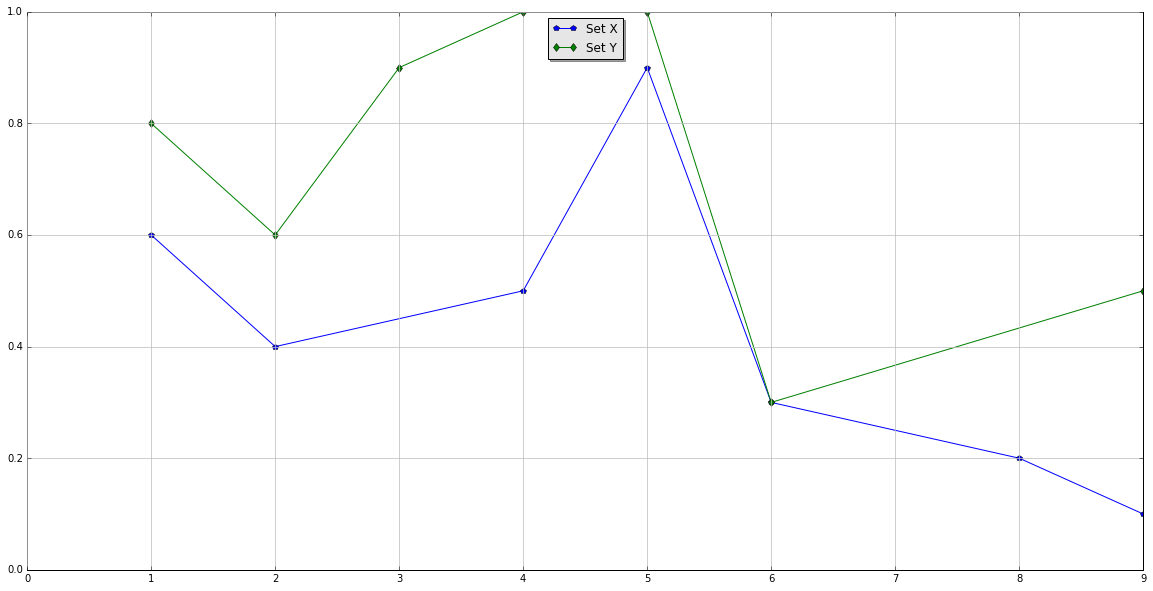

In [48]:
X = FuzzySet((0.6, 1),(0.4, 2),(0.5, 4),(0.9, 5),(0.3, 6),(0.2, 8),(0.1, 9))
Y = FuzzySet((0.8, 1),(0.6, 2),(0.9, 3),(1, 4),(1, 5),(0.3, 6),(0.5, 9))

print('Универсум множества Х:', X.get_universum())

print('Носитель множества X:', X.get_support())

result_string = 'Точки перехода множества X: '
result_list = X.get_points()
for p in range(len(result_list) - 1):
    result_string = result_string + str(p) + ', '
result_string += str(result_list[-1])
print(result_string)

if X.get_modal():
    print('Функция множества X унимодальна.')
else:
    print('Функция множества X не унимодально.')
    
if X.get_normal_subnormal:
    print('Множество X нормально.')
else:
    print('Множество Х субнормально.')
    
result_string = 'Высота множества X: '
result_list = X.get_height()
print(result_string, result_list)

result_string = 'Ядро множества X: '
result_set = X.get_core()
if result_set is not None:
    print(result_string, result_set)
else:
    result_string += 'отсутствует.'
print(result_string)

result_string = 'Границы множества X: '
result_set = X.get_borders()
print(result_string, result_set, '\n')

print('Универсум множества Y:', Y.get_universum())

print('Носитель множества Y:', Y.get_support())

result_string = 'Точки перехода множества Y: '
result_list = Y.get_points()
for p in range(len(result_list) - 1):
    result_string = result_string + str(p) + ', '
result_string += str(result_list[-1])
print(result_string)

if Y.get_modal():
    print('Функция множества Y унимодальна.')
else:
    print('Функция множества Y не унимодально.')
    
if Y.get_normal_subnormal:
    print('Множество Y нормально.')
else:
    print('Множество Y субнормально.')
    
result_string = 'Высота множества Y: '
result_list = Y.get_height()
print(result_string, result_list)

result_string = 'Ядро множества Y: '
result_set = Y.get_core()
if result_set is not None:
    print(result_string, result_set)
else:
    result_string += 'отсутствует.'

result_string = 'Границы множества Y: '
result_set = Y.get_borders()
print(result_string, result_set, '\n')

xs_X = [1, 2, 4, 5, 6, 8, 9]
ys_X = [0.6, 0.4, 0.5, 0.9, 0.3, 0.2, 0.1]

xs_Y = [1, 2, 3, 4, 5, 6, 9]
ys_Y = [0.8, 0.6, 0.9, 1, 1, 0.3, 0.5]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(xs_X, ys_X, '-bp',label = 'Set X')
ax.plot(xs_Y, ys_Y, '-gd',label = 'Set Y')
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper center', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

Задание 2. Написать функцию, приводящую субнормальное нечеткое множество к нормальному.
$$ X = \{\frac{0,6}{1} + \frac{0,4}{2} + \frac{0,5}{4} + \frac{0,9}{5} + \frac{0,3}{6} + \frac{0,2}{8} + \frac{0,1}{9}\} $$
$$ Y = \{\frac{0,8}{1} + \frac{0,6}{2} + \frac{0,9}{3} + \frac{1}{4} + \frac{1}{5} + \frac{0,3}{6} + \frac{0,5}{9}\} $$

In [5]:
print('Множество Х:')
result_set = X.get_normal_set()
if result_set:
    print(result_set)
else:
    print('Множество уже нормально.')
    
print('\nМножество Y:')
result_set = Y.get_normal_set()
if result_set:
    print(result_set)
else:
    print('Множество уже нормально.')

Множество Х:
{(0.67, 1), (0.33, 6), (1.0, 5), (0.56, 4), (0.11, 9), (0.22, 8), (0.44, 2)}

Множество Y:
Множество уже нормально.


Задание 3. Создать функцию, которая по исходным данным выполняет построение графика (исходные данные: $ x_{0} $, $ x_{n} $ -- начальные и конечные значения аргумента; $ h $ -- шаг, с которым изменяется аргумент; $ f(x) = ax ^ 2 - bx + c $ -- заданная функция.
$$ x_{0} = -20 $$
$$ x_{n} = -10 $$
$$ h = 0,1 $$
$$ a = 3 $$
$$ b = 2 $$
$$ c = 5 $$

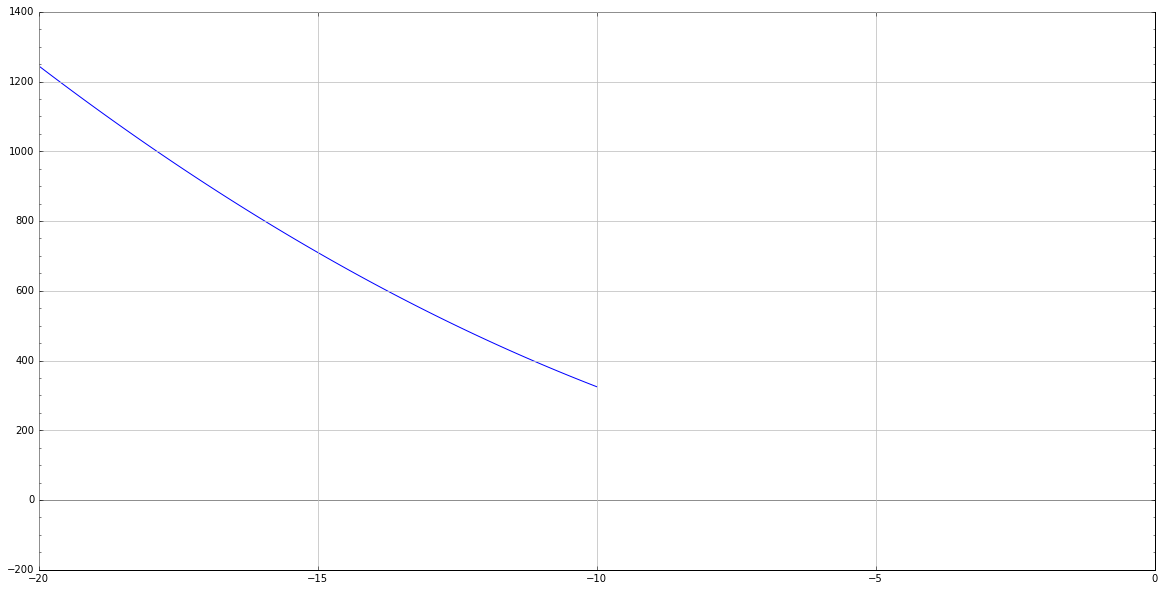

In [7]:
x0 = -20
xn = -10
h = 0.1
a = 3
b = 2
c = 5

f = lambda x: a*x*x - b*x + c

xs = np.arange(x0, xn + h, h)
ys = [f(x) for x in xs]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(xs, ys)
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

Задание 4. Создать пользовательскую функцию, результатом которой будет массив значений, заносящийся в ячейки. Выполнить графическое отображение работы функции.

\begin{equation*}
    y = 
    \begin{cases}
        e^{-2x}, x\le0,
        \\
        \cos{(x-\pi/6)}, 0<x<5,
        \\
        \sqrt{x}, x\ge5
    \end{cases}
\end{equation*}
$$ x\in[-3,10]$$

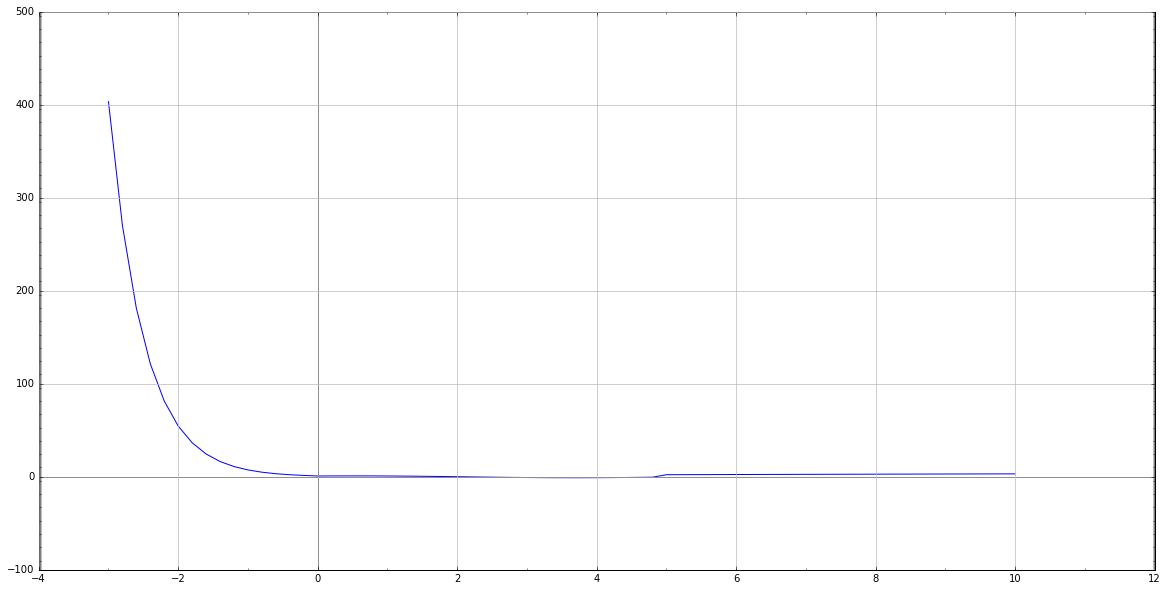

In [18]:
y = lambda x: mth.exp(-2*x) if x <= 0 else mth.cos(x - mth.pi/6) if x < 5 else mth.sqrt(x)

xs = np.arange(-3, 10 + 0.2, 0.2)
ys = [y(x) for x in xs]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(xs, ys)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

In [19]:
pnd.DataFrame(np.array([xs, ys]), index = ['x', 'y'])

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
x,-3.000000,-2.800000,-2.600000,-2.400000,-2.200000,-2.00000,-1.800000,-1.60000,-1.400000,-1.200000,...,8.200000,8.400000,8.600000,8.800000,9.0,9.20000,9.400000,9.600000,9.800000,10.000000
y,403.428793,270.426407,181.272242,121.510418,81.450869,54.59815,36.598234,24.53253,16.444647,11.023176,...,2.863564,2.898275,2.932576,2.966479,3.0,3.03315,3.065942,3.098387,3.130495,3.162278
